# 이미지파일 전처리
  ## 방법 1
  

출처: 캐글 데이터 커널

In [0]:
# gdrive에 mount
from google.colab import drive
drive.mount('/content/gdrive')
# 경로 설정
import os
os.chdir('/content/gdrive/My Drive/Plant_leaf')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
os.getcwd()

'/content/gdrive/My Drive/Plant_leaf'

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import cv2
import os
from tqdm import tqdm
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
from keras.models import Model,Sequential, Input, load_model
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization, AveragePooling2D, GlobalAveragePooling2D
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from keras.applications import DenseNet121

In [0]:
disease_types = os.listdir()
#['Pepper__bell___Bacterial_spot','Pepper__bell___healthy','Potato___Early_blight','Potato___Late_blight','Potato___healthy','Tomato_Bacterial_spot','Tomato_Early_blight','Tomato_Late_blight','Tomato_Leaf_Mold','Tomato_Septoria_leaf_spot','Tomato_Spider_mites_Two_spotted_spider_mite','Tomato__Target_Spot','Tomato__Tomato_YellowLeaf__Curl_Virus','Tomato__Tomato_mosaic_virus','Tomato_healthy']
data_dir = '/content/gdrive/My Drive/Plant_leaf/'
train_dir = os.path.join(data_dir)
#test_dir = os.path.join(data_dir, 'test')
train_dir

'/content/gdrive/My Drive/Plant_leaf/'

In [0]:
os.listdir()

['Tomato___Tomato_Yellow_Leaf_Curl_Virus',
 'Tomato___Tomato_mosaic_virus',
 'Tomato___Target_Spot',
 'Tomato___Spider_mites Two-spotted_spider_mite',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Leaf_Mold',
 'Tomato___Late_blight',
 'Tomato___healthy',
 'Tomato___Early_blight',
 'Tomato___Bacterial_spot',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Potato___Late_blight',
 'Potato___healthy',
 'Potato___Early_blight',
 'Peach___healthy',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Grape___Esca_(Black_Measles)',
 'Grape___Black_rot',
 'Corn___Northern_Leaf_Blight',
 'Corn___healthy',
 'Corn___Common_rust',
 'Corn___Cercospora_leaf_spot Gray_leaf_spot',
 'Cherry___Powdery_mildew',
 'Cherry___healthy',
 'Apple___healthy',
 'Apple___Cedar_apple_rust',
 'Apple___Black_rot',
 'Apple___Apple_scab',
 'Peach___Bacterial_spot',
 'Pepper__bell___healthy',
 'Pepper__bell___Bacterial_spot',
 'obj_2.npy']

In [0]:
train_data = []
for defects_id, sp in enumerate(disease_types):
    for file in os.listdir(os.path.join(train_dir, sp)):
        train_data.append(['{}/{}'.format(sp, file), defects_id, sp])
        
train = pd.DataFrame(train_data, columns=['File', 'DiseaseID','Disease Type'])
train.tail()

,File,DiseaseID,Disease Type
39995,Pepper__bell___Bacterial_spot/image (940).JPG,32,Pepper__bell___Bacterial_spot
39996,Pepper__bell___Bacterial_spot/image (538).JPG,32,Pepper__bell___Bacterial_spot
39997,Pepper__bell___Bacterial_spot/image (193).JPG,32,Pepper__bell___Bacterial_spot
39998,Pepper__bell___Bacterial_spot/image (479).JPG,32,Pepper__bell___Bacterial_spot
39999,Pepper__bell___Bacterial_spot/image (71).JPG,32,Pepper__bell___Bacterial_spot


In [0]:
# Randomize the order of training set
SEED = 42
train = train.sample(frac=1, random_state=SEED) 
train.index = np.arange(len(train)) # Reset indices
train.head()

,File,DiseaseID,Disease Type
0,Apple___healthy/image (272).JPG,26,Apple___healthy
1,Tomato___Bacterial_spot/image (709).JPG,9,Tomato___Bacterial_spot
2,Corn___Common_rust/image (735).JPG,22,Corn___Common_rust
3,Tomato___Target_Spot/image (1188).JPG,2,Tomato___Target_Spot
4,Corn___Northern_Leaf_Blight/image (348).JPG,20,Corn___Northern_Leaf_Blight


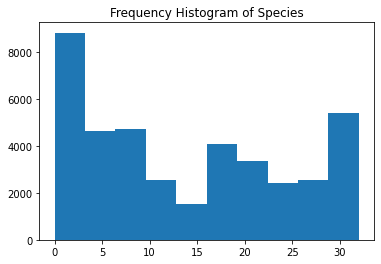

In [0]:
# Plot a histogram
plt.hist(train['DiseaseID'])
plt.title('Frequency Histogram of Species')
#plt.figure(figsize=(33, 33))
plt.show()

In [0]:

IMAGE_SIZE = 32

def read_image(filepath):
    return cv2.imread(os.path.join(data_dir, filepath)) # Loading a color image is the default flag
# Resize image to target size
def resize_image(image, image_size):
    return cv2.resize(image.copy(), image_size, interpolation=cv2.INTER_AREA)
  

In [0]:

X_train = np.zeros((train.shape[0], IMAGE_SIZE, IMAGE_SIZE, 3))
for i, file in tqdm(enumerate(train['File'].values)):
    image = read_image(file)
    if image is not None:
        X_train[i] = resize_image(image, (IMAGE_SIZE, IMAGE_SIZE))
# Normalize the data
#X_Train = X_train / 255.
print('Train Shape: {}'.format(X_train.shape))


40000it [02:34, 259.49it/s]

Train Shape: (40000, 32, 32, 3)


In [0]:
del(X_Train)

In [0]:
print('>>> data 저장중 ...')
np.save("/content/gdrive/My Drive/전처리 후/32size_norepeat.npy", X_train)
print("done")

>>> data 저장중 ...
done


In [0]:
Y_Train = train['DiseaseID'].values
Y_Train = to_categorical(Y_Train, num_classes=33)

In [0]:
Y_Train.shape

(40000, 33)

In [0]:
print('>>> data 저장중 ...')
np.save("/content/gdrive/My Drive/전처리 후/no_repeat_y.npy", Y_Train)
print('ok', len(Y_Train))

>>> data 저장중 ...
ok 40000


## 방법 2
* 에러는 안나는데... 4만에서 멈추지 않고 계속 무한반복함

In [0]:
from PIL import Image
import os, glob
import numpy as np
from sklearn.model_selection import train_test_split

# 분류 대상 카테고리 선택하기 
categories = disease_types
nb_classes = 33
caltech_dir = "/content/gdrive/My Drive/Plant_leaf"

# 이미지 크기 지정 
image_w = 64 
image_h = 64
pixels = image_w * image_h * 3
# 이미지 데이터 읽어 들이기 
X = []
Y = []

for idx, cat in enumerate(categories):
    # 레이블 지정 
    label = [0 for i in range(nb_classes)]
    label[idx] = 1

    #image_dir = caltech_dir + "/" + cat
    #files = glob.glob(image_dir+"/*.jpg")
    #print(cat, " 파일 길이 : ", len(files))

    # 이미지 
  
    for i, f in tqdm(enumerate(train['File'].values)):
        img = Image.open(f) 
        img = img.convert("RGB")
        img = img.resize((image_w, image_h))
        data = np.asarray(img)      # numpy 배열로 변환
        X.append(data)
        Y.append(label)
        if i % 100 == 0:
            print(i, "\n")
        if i == 39899:
            break;
    if idx == 32:
      break;

0 

100 

200 

300 

400 

500 

600 

700 

800 

900 

1000 

1100 

1200 

1300 

1400 

1500 

1600 

1700 

1800 

1900 

2000 

2100 

2200 

2300 

2400 

2500 

2600 

2700 

2800 

2900 

3000 

3100 

3200 

3300 

3400 

3500 

3600 

3700 

3800 

3900 

4000 

4100 

4200 

4300 

4400 

4500 

4600 

4700 

4800 

4900 

5000 

5100 

5200 

5300 

5400 

5500 

5600 

5700 

5800 

5900 

6000 

6100 

6200 

6300 

6400 

6500 

6600 

6700 

6800 

6900 

7000 

7100 

7200 

7300 

7400 

7500 

7600 

7700 

7800 

7900 

8000 

8100 

8200 

8300 

8400 

8500 

8600 

8700 

8800 

8900 

9000 

9100 

9200 

9300 

9400 

9500 

9600 

9700 

9800 

9900 

10000 

10100 

10200 

10300 

10400 

10500 

10600 

10700 

10800 

10900 

11000 

11100 

11200 

11300 

11400 

11500 

11600 

11700 

11800 

11900 

12000 

12100 

12200 

12300 

12400 

12500 



KeyboardInterrupt: ignored

방법 2 깃헙 주소

https://jaehyeongan.github.io/2018/07/01/CNN-%EB%AA%A8%EB%8D%B8%EC%9D%84-%ED%86%B5%ED%95%9C-%EC%9E%90%EB%8F%99%EC%B0%A8-%EC%82%AC%EA%B3%A0-%EC%9D%B4%EB%AF%B8%EC%A7%80-%EB%B6%84%EB%A5%98/